<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch02_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

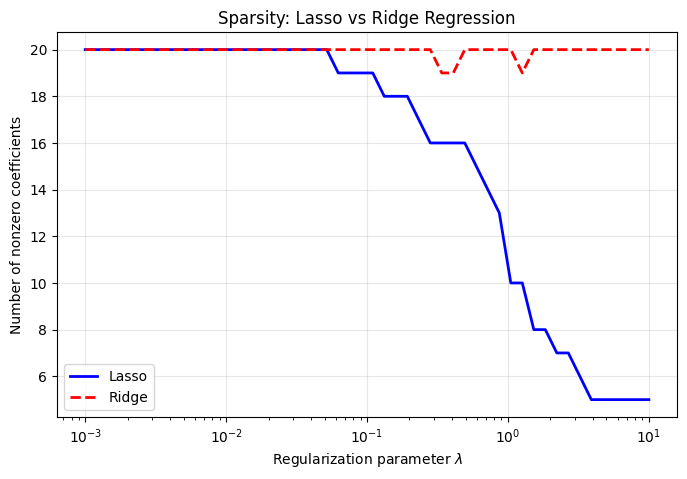

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
m, n = 100, 20 # 100 samples, 20 features
x_true = np.zeros(n)
x_true[:5] = [3, -2, 1.5, -1, 0.5] # Only 5 nonzero coefficients

A = np.random.randn(m, n)
b = A @ x_true + 0.1 * np.random.randn(m) # Add noise

# Solve for different regularization strengths
lambdas = np.logspace(-3, 1, 50)

def solve_lasso(A, b, lam):
    x = cp.Variable(n)
    objective = cp.Minimize(cp.sum_squares(A @ x - b) + lam * cp.norm(x, 1))
    problem = cp.Problem(objective)
    problem.solve()
    return x.value

def solve_ridge(A, b, lam):
    x = cp.Variable(n)
    objective = cp.Minimize(cp.sum_squares(A @ x - b) + lam * cp.sum_squares(x))
    problem = cp.Problem(objective)
    problem.solve()
    return x.value

# Compare sparsity
lasso_solutions = [solve_lasso(A, b, lam) for lam in lambdas]
ridge_solutions = [solve_ridge(A, b, lam) for lam in lambdas]

lasso_nnz = [np.sum(np.abs(x) > 1e-4) for x in lasso_solutions]
ridge_nnz = [np.sum(np.abs(x) > 1e-4) for x in ridge_solutions]

plt.figure(figsize=(8, 5))
plt.semilogx(lambdas, lasso_nnz, 'b-', label='Lasso', linewidth=2)
plt.semilogx(lambdas, ridge_nnz, 'r--', label='Ridge', linewidth=2)
plt.xlabel('Regularization parameter $\\lambda$')
plt.ylabel('Number of nonzero coefficients')
plt.title('Sparsity: Lasso vs Ridge Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('lasso_vs_ridge.pdf', bbox_inches='tight')